In [ ]:
#Load Data
import pandas as pd
data = pd.read_csv('/content/Telco-Customer-Churn.csv')
df = pd.DataFrame(data)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,F,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7038 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7040 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# cek outlier
df.gender.unique()

array(['F', 'Male', 'Female', 'M', nan], dtype=object)

In [ ]:
# transformasi data - mengubah tipe data menjadi numerik
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1, 'F': 0, 'M': 1})
df['Partner'] = df['Partner'].replace({'Yes': 0, 'No': 1})
df['Dependents'] = df['Dependents'].replace({'Yes': 0, 'No': 1})
df['PhoneService'] = df['PhoneService'].replace({'Yes': 0, 'No': 1})
df['MultipleLines'] = df['MultipleLines'].replace({'Yes': 0, 'No': 1, 'No phone service': 2})
df['InternetService'] = df['InternetService'].replace({'DSL': 0, 'Fiber optic': 1, 'No': 2})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'Yes': 0, 'No': 1, 'No internet service': 2})
df['OnlineBackup'] = df['OnlineBackup'].replace({'Yes': 0, 'No': 1, 'No internet service': 2})
df['DeviceProtection'] = df['DeviceProtection'].replace({'Yes': 0, 'No': 1, 'No internet service': 2})
df['TechSupport'] = df['TechSupport'].replace({'Yes': 0, 'No': 1, 'No internet service': 2})
df['StreamingTV'] = df['StreamingTV'].replace({'Yes': 0, 'No': 1, 'No internet service': 2})
df['StreamingMovies'] = df['StreamingMovies'].replace({'Yes': 0, 'No': 1, 'No internet service': 2})
df['Contract'] = df['Contract'].replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df['PaymentMethod'] = df['PaymentMethod'].replace({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'Yes': 0, 'No': 1})
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
df.copy()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0.0,0,0,1,1.0,1,2,0,1,...,1,1,1,1,0,0,0,29.85,29.85,0
1,5575-GNVDE,0.0,0,1,1,34.0,0,1,0,0,...,0,1,1,1,1,1,1,56.95,1889.50,0
2,3668-QPYBK,0.0,0,1,1,2.0,0,1,0,0,...,1,1,1,1,0,0,1,53.85,108.15,1
3,7795-CFOCW,0.0,0,1,1,45.0,1,2,0,0,...,0,0,1,1,1,1,2,42.30,1840.75,0
4,9237-HQITU,1.0,0,1,1,2.0,0,1,1,1,...,1,1,1,1,0,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0.0,0,0,0,24.0,0,0,0,0,...,0,0,0,0,1,0,1,84.80,1990.50,0
7039,2234-XADUH,1.0,0,0,0,72.0,0,0,1,1,...,0,1,0,0,1,0,3,103.20,7362.90,0
7040,4801-JZAZL,1.0,0,0,0,11.0,1,2,0,0,...,1,1,1,1,0,0,0,29.60,346.45,0
7041,8361-LTMKD,0.0,1,0,1,4.0,0,0,1,1,...,1,1,1,1,0,0,1,74.40,306.60,1


In [ ]:
# transformsi data - drop variabel yang tidak digunakan
df2 = df.drop('customerID', axis = 1)

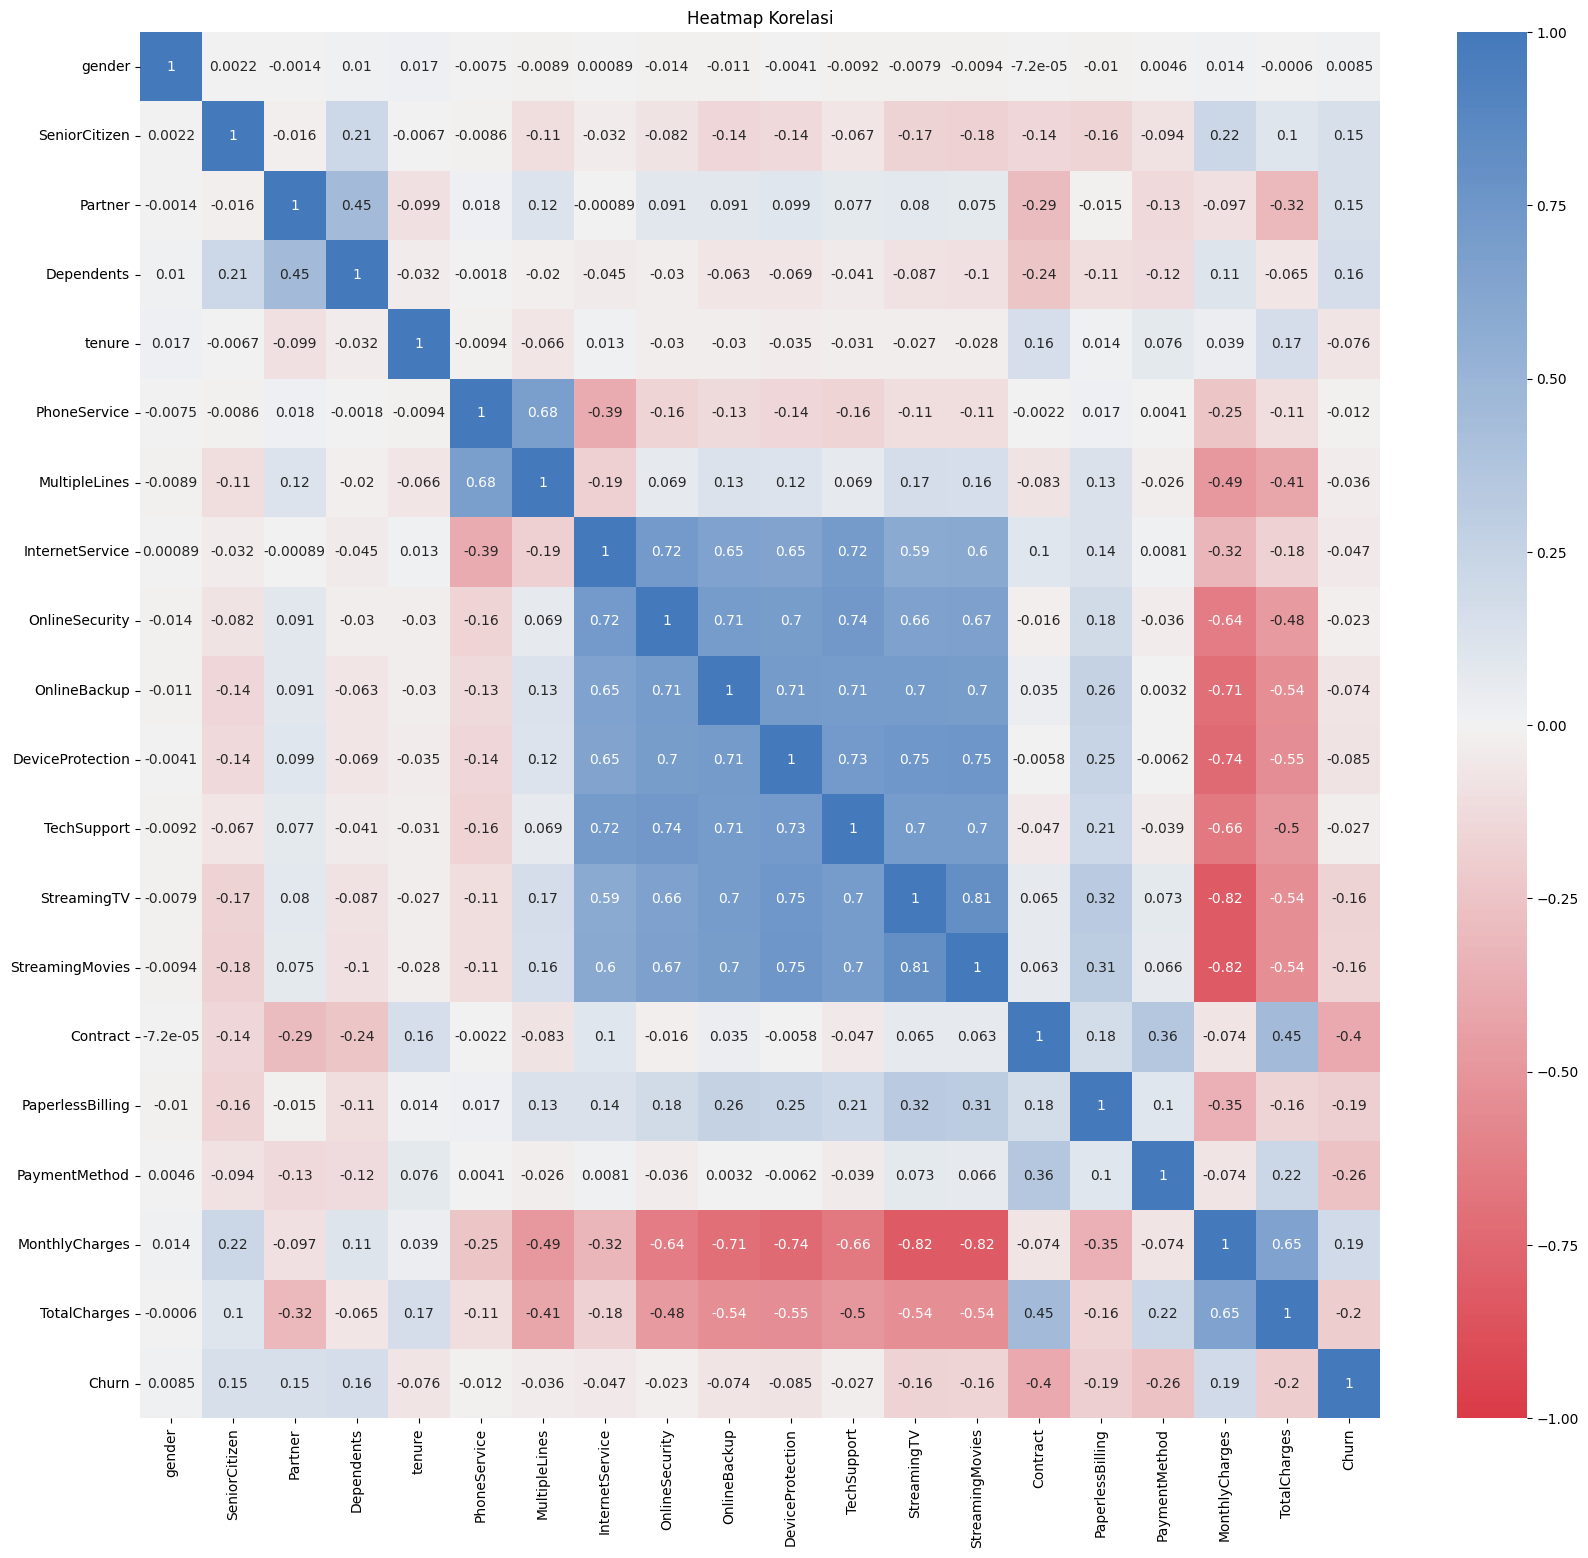

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Menghitung korelasi
corr = df2.corr()
# Membuat visualisasi korelasi dengan heatmap
plt.figure(figsize=(20, 18))
warna = sns.diverging_palette(10, 250, as_cmap=True)
# Memetakan nilai korelasi di setiap sel
sns.heatmap(corr, annot=True, cmap=warna, vmin=-1, vmax=1)
plt.title("Heatmap Korelasi")
plt.savefig("heatmap_korelasi.jpg")
plt.show()

In [ ]:
#melihat nilai statistik
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7038.000000,7043.000000,7043.000000,7043.000000,7040.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.495311,0.162147,0.516967,0.700412,35.043892,0.096834,0.674996,0.872923,0.930001,0.871788,0.872781,0.926452,0.832316,0.828766,0.690473,0.407781,1.315633,64.761692,2283.300441,0.734630
std,0.500014,0.368612,0.499748,0.458110,115.282871,0.295752,0.642730,0.737796,0.706051,0.738369,0.737868,0.708201,0.756958,0.758507,0.833755,0.491457,1.148907,30.090047,2266.771362,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,29.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,7100.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


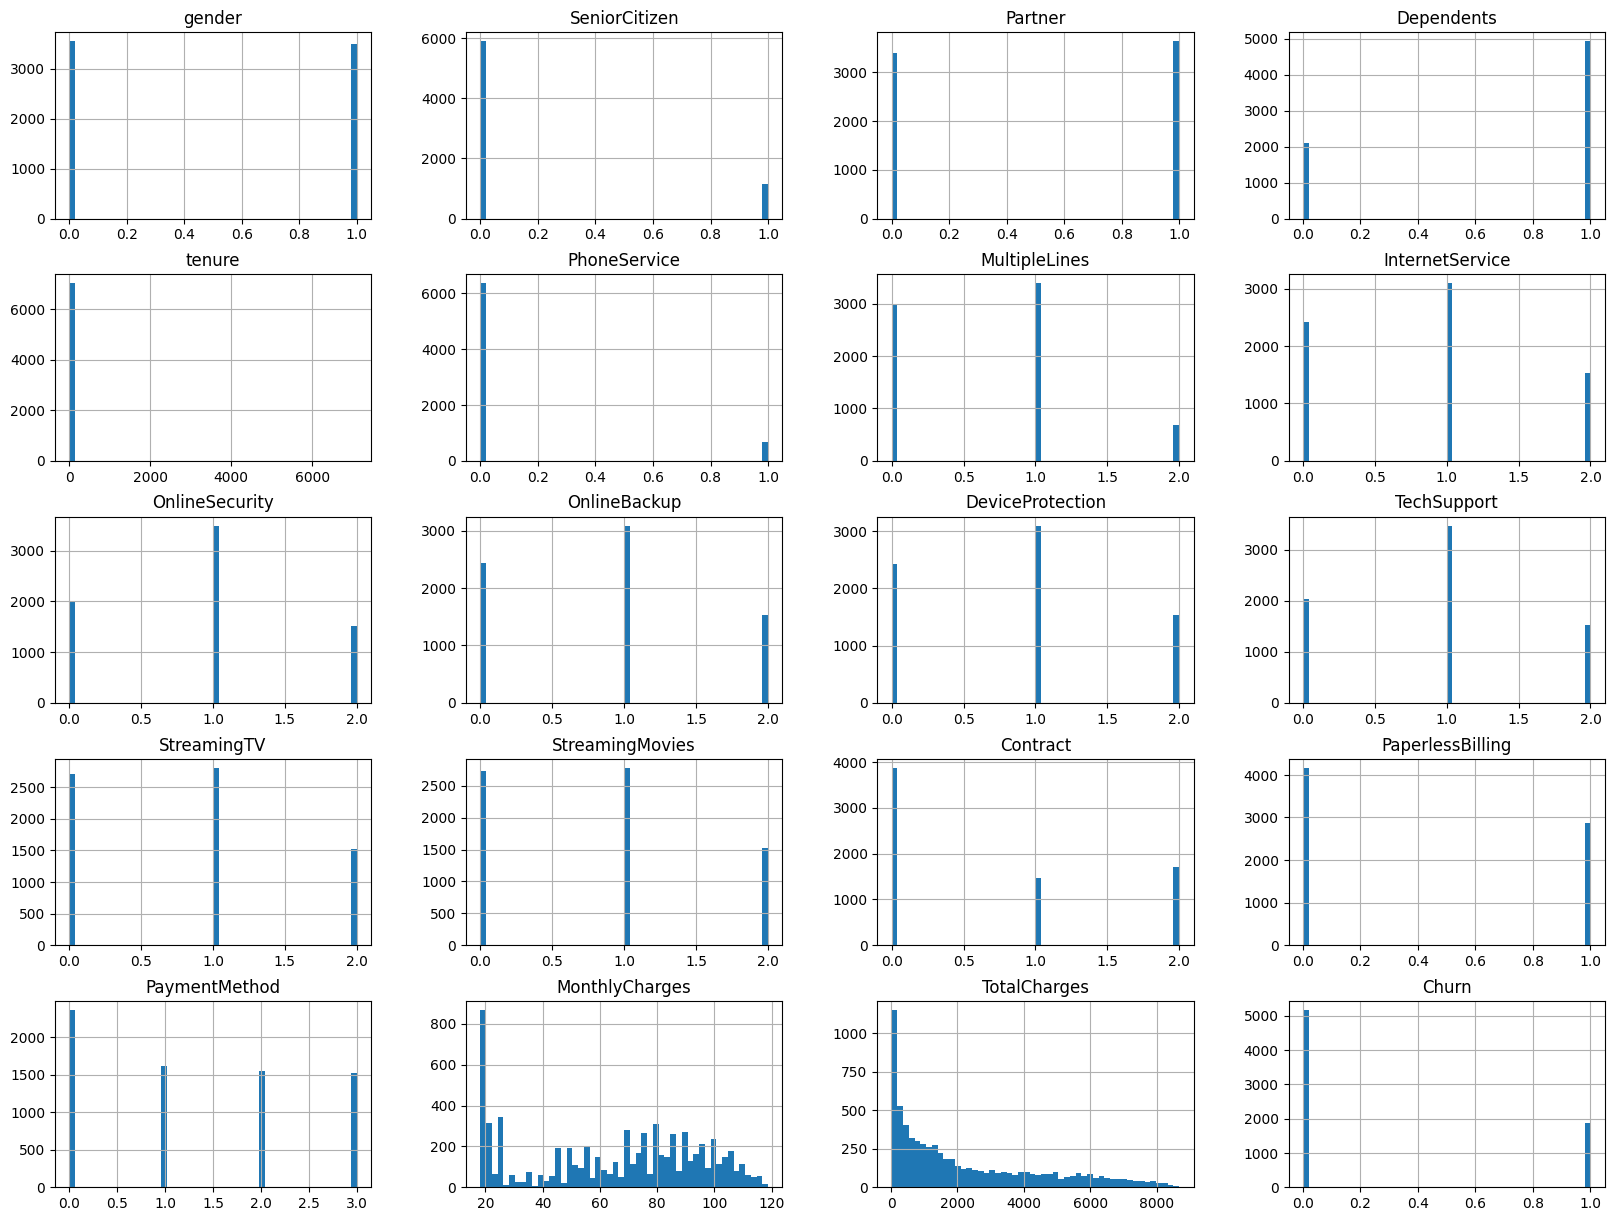

In [ ]:
#visualissasi data histogram
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
# visualisasi data - pie chart
import plotly.express as px
churn_counts = df['Churn'].value_counts()
churn_data = pd.DataFrame({'Churn': churn_counts.index, 'Count': churn_counts.values})
fig_churn = px.pie(churn_data, values='Count', names='Churn', title='Distribution of Churn')
fig_churn.show()

In [ ]:
# identifikasi kolom
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# cek null value
df.isna().sum()

customerID           0
gender               5
SeniorCitizen        0
Partner              0
Dependents           0
tenure               3
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# identifikasi kolom yang memiliki null value
columns_with_null = df.columns[df.isnull().any()]
print(columns_with_null)

Index(['gender', 'tenure', 'TotalCharges'], dtype='object')


In [ ]:
#cek baris yang bernilai null
row_null = df.isnull()
row_null

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Data Cleaning

In [ ]:
# handling null value methode drop
df2 = df.dropna()
df2.copy()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0.0,0,0,1,1.0,1,2,0,1,...,1,1,1,1,0,0,0,29.85,29.85,0
1,5575-GNVDE,0.0,0,1,1,34.0,0,1,0,0,...,0,1,1,1,1,1,1,56.95,1889.50,0
2,3668-QPYBK,0.0,0,1,1,2.0,0,1,0,0,...,1,1,1,1,0,0,1,53.85,108.15,1
3,7795-CFOCW,0.0,0,1,1,45.0,1,2,0,0,...,0,0,1,1,1,1,2,42.30,1840.75,0
4,9237-HQITU,1.0,0,1,1,2.0,0,1,1,1,...,1,1,1,1,0,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0.0,0,0,0,24.0,0,0,0,0,...,0,0,0,0,1,0,1,84.80,1990.50,0
7039,2234-XADUH,1.0,0,0,0,72.0,0,0,1,1,...,0,1,0,0,1,0,3,103.20,7362.90,0
7040,4801-JZAZL,1.0,0,0,0,11.0,1,2,0,0,...,1,1,1,1,0,0,0,29.60,346.45,0
7041,8361-LTMKD,0.0,1,0,1,4.0,0,0,1,1,...,1,1,1,1,0,0,1,74.40,306.60,1


In [ ]:
# cek null value
df2.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# cek data setelah data cleaning ( jumlah sebelum berapa sesudah berapa)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7025 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7025 non-null   object 
 1   gender            7025 non-null   float64
 2   SeniorCitizen     7025 non-null   int64  
 3   Partner           7025 non-null   int64  
 4   Dependents        7025 non-null   int64  
 5   tenure            7025 non-null   float64
 6   PhoneService      7025 non-null   int64  
 7   MultipleLines     7025 non-null   int64  
 8   InternetService   7025 non-null   int64  
 9   OnlineSecurity    7025 non-null   int64  
 10  OnlineBackup      7025 non-null   int64  
 11  DeviceProtection  7025 non-null   int64  
 12  TechSupport       7025 non-null   int64  
 13  StreamingTV       7025 non-null   int64  
 14  StreamingMovies   7025 non-null   int64  
 15  Contract          7025 non-null   int64  
 16  PaperlessBilling  7025 non-null   int64  


In [ ]:
#ketika ada data kateogrical(y/n)
from sklearn.preprocessing import LabelEncoder

In [ ]:
# setting target clasification
x = df2.drop(['Churn','customerID'], axis = 1)
y = df2['Churn']

In [ ]:
#cek jumlah data customer churn
jumlah_label = df2['Churn'].shape[0]
jumlah_churn_1 = df2[df2['Churn'] == 1].shape[0]
jumlah_churn_0 = df2[df2['Churn'] == 0].shape[0]
print("Jumlah data yang digunakan untuk label :", jumlah_label)
print("Jumlah data dengan label Churn :", jumlah_churn_1)
print("Jumlah data dengan label No Churn :", jumlah_churn_0)

Jumlah data yang digunakan untuk label : 7025
Jumlah data dengan label Churn : 1868
Jumlah data dengan label No Churn : 5157


# spliting data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [ ]:
print("jumlah data test : ",x_test.shape[0])

jumlah data test :  1405


In [ ]:
print("jumlah data train : ",x_train.shape[0])

jumlah data train :  5620


In [ ]:
x_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4459,1.0,0,1,1,1.0,0,0,1,1,0,1,1,0,0,0,0,3,100.25,100.25
4292,1.0,1,1,1,31.0,0,0,1,1,1,1,1,1,1,0,0,0,73.90,2217.15
5025,0.0,0,0,0,6.0,0,1,1,1,1,1,1,1,1,0,0,0,69.80,377.85
2077,1.0,0,1,1,1.0,0,1,1,1,1,1,1,1,1,0,1,0,71.35,71.35
2405,1.0,0,0,0,8.0,0,1,1,1,1,0,1,0,0,0,0,0,94.20,777.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,0.0,0,1,1,20.0,0,1,1,1,1,1,1,0,1,0,1,0,78.80,1641.30
5375,1.0,0,1,1,1.0,0,1,0,1,1,1,0,1,1,0,0,0,50.80,50.80
4928,1.0,1,0,0,4.0,0,1,0,1,1,1,1,1,1,0,1,0,46.00,181.60
395,1.0,0,1,1,66.0,0,0,0,0,0,0,0,0,0,2,0,3,90.05,5965.95


In [ ]:
y_test

4459    1
4292    1
5025    0
2077    1
2405    1
       ..
5035    0
5375    1
4928    1
395     0
1017    0
Name: Churn, Length: 1405, dtype: int64

In [ ]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4664,1.0,0,1,1,2.0,0,0,1,1,1,1,1,1,1,0,1,3,74.90,147.15
2944,0.0,0,1,1,12.0,1,2,0,0,0,1,0,0,1,0,0,2,50.95,605.75
866,0.0,0,0,1,62.0,1,2,0,1,1,1,0,0,1,2,0,2,39.00,2337.45
2007,0.0,0,1,1,2.0,0,1,1,1,1,1,1,1,0,0,0,0,80.20,181.10
4110,0.0,0,0,1,70.0,0,1,0,0,0,1,0,1,0,2,1,1,67.95,4664.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,1.0,0,0,0,45.0,0,0,2,2,2,2,2,2,2,1,0,3,25.90,1216.60
3941,0.0,0,0,0,7.0,0,1,2,2,2,2,2,2,2,0,0,2,20.25,174.70
5971,0.0,0,0,0,66.0,0,1,2,2,2,2,2,2,2,2,1,3,20.00,1374.20
6954,0.0,0,1,1,15.0,0,1,2,2,2,2,2,2,2,0,0,1,19.80,309.40


In [ ]:
y_train

4664    1
2944    0
866     0
2007    1
4110    0
       ..
79      0
3941    0
5971    0
6954    0
5656    0
Name: Churn, Length: 5620, dtype: int64

# Membuat model clasification

In [ ]:
# library untuk modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

# Hasil modelling dan Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Meneghitung laporan  klasifikasi untuk model Decission Tree
print("Classification Report for Decision Tree : \n", classification_report(y_test,dt_pred))

#menghitung dan menceteak confusion matrix untuk model Decission Tree
print("Confusion Matrix : \n", confusion_matrix(y_test, dt_pred))

Classification Report for Decision Tree : 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1056
           1       0.45      0.48      0.46       349

    accuracy                           0.72      1405
   macro avg       0.64      0.64      0.64      1405
weighted avg       0.73      0.72      0.73      1405

Confusion Matrix : 
 [[852 204]
 [183 166]]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Meneghitung laporan  klasifikasi untuk model Random Forest
print("Classification Report for Random Forest : \n", classification_report(y_test,rf_pred))

#menghitung dan menceteak confusion matrix untuk model Random Forest
print("Confusion Matrix : \n", confusion_matrix(y_test, rf_pred))

Classification Report for Random Forest : 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1056
           1       0.64      0.50      0.56       349

    accuracy                           0.81      1405
   macro avg       0.74      0.70      0.72      1405
weighted avg       0.80      0.81      0.80      1405

Confusion Matrix : 
 [[959  97]
 [175 174]]


In [ ]:
# Compare Decision Three VS Random Forest
report_dt = classification_report(y_test, dt_pred, output_dict=True)
report_rf = classification_report(y_test, rf_pred, output_dict=True)
data = {
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [report_dt['accuracy'], report_rf['accuracy']],
    'Precision': [report_dt['1']['precision'], report_rf['1']['precision']],
    'Recall': [report_dt['1']['recall'], report_rf['1']['recall']],
    'F1-Score': [report_dt['1']['f1-score'], report_rf['1']['f1-score']]
}
df_eval = pd.DataFrame(data)
df_eval

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.724555,0.448649,0.475645,0.461752
1,Random Forest,0.806406,0.642066,0.498567,0.561290


# Identifikasi Feature Importance

In [ ]:
# Membuat Feature Importance
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

             Feature  Importance
18      TotalCharges    0.191783
17    MonthlyCharges    0.178307
4             tenure    0.171590
14          Contract    0.079882
16     PaymentMethod    0.057475
8     OnlineSecurity    0.029799
0             gender    0.027970
7    InternetService    0.027795
9       OnlineBackup    0.027063
11       TechSupport    0.025860
15  PaperlessBilling    0.024923
10  DeviceProtection    0.024563
13   StreamingMovies    0.023691
6      MultipleLines    0.023457
2            Partner    0.022659
1      SeniorCitizen    0.020895
3         Dependents    0.019627
12       StreamingTV    0.018783
5       PhoneService    0.003877


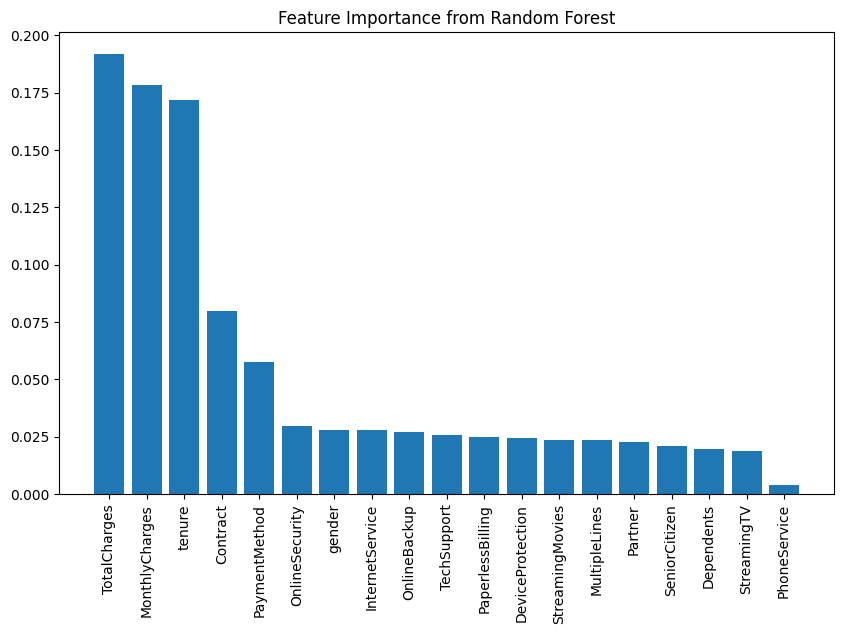

In [ ]:
# Visualisasi  Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.title('Feature Importance from Random Forest')
plt.show()